In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("summary_list.csv",index_col=0)
df.head()

,実験分類,区分,名称,宿主（誘導体含む）,備考・ベクター（誘導体含む）
0,認定宿主ベクター系,1B1,EK1,Escherichia coli K12,プラスミド（接合等により宿主以外の細菌に伝達されないもの）
1,認定宿主ベクター系,1B1,EK1,Escherichia coli K12,バクテリオファージの核酸（接合等により宿主以外の細菌に伝達されないもの）
2,認定宿主ベクター系,1B1,EK1,Escherichia coli B,プラスミド（接合等により宿主以外の細菌に伝達されないもの）
3,認定宿主ベクター系,1B1,EK1,Escherichia coli B,バクテリオファージの核酸（接合等により宿主以外の細菌に伝達されないもの）
4,認定宿主ベクター系,1B1,EK1,Escherichia coli C,プラスミド（接合等により宿主以外の細菌に伝達されないもの）


In [2]:
df.tail()

,実験分類,区分,名称,宿主（誘導体含む）,備考・ベクター（誘導体含む）
930,4,-,ウイルス,Sabia virus,承認生 ワクチン株を除く。
931,4,-,ウイルス,Sudan ebolavirus,承認生 ワクチン株を除く。
932,4,-,ウイルス,Tai Forest ebolavirus (別名Ivory Coast ebolavirus),承認生 ワクチン株を除く。
933,4,-,ウイルス,"Variola virus (major, minor)",承認生 ワクチン株を除く。
934,4,-,ウイルス,Zaire ebolavirus,承認生 ワクチン株を除く。


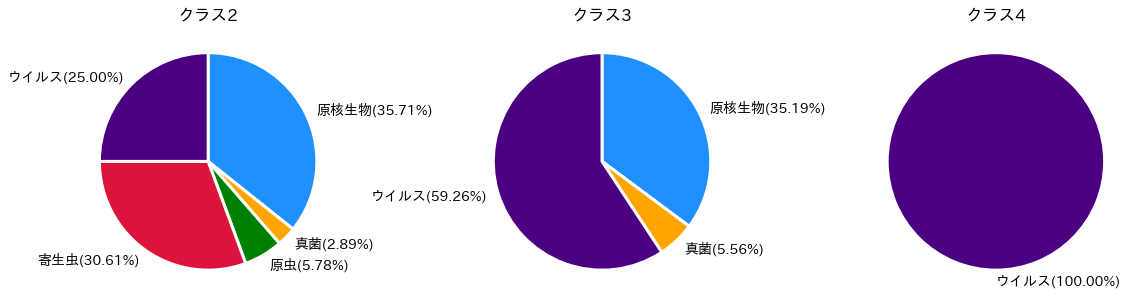

In [3]:
plt.rcParams["font.family"] = 'IPAexGothic'
plt.rcParams["font.size"] = 14

plt.figure(figsize=[20,5])

colorgroup = {"原核生物":"#1e90ff","真菌":"orange","原虫":"green","寄生虫":"#dc143c","ウイルス":"#4b0082"}

for num in range(2,5):
    plt.subplot(1,3,num-1)
    df_2 = df[df["実験分類"]==f"{num}"]
    unigroup = df_2["名称"].unique()
    class2 = {}
    colors = {}
    for name in unigroup:
        class2[name] = df_2[df_2["名称"].str.contains(name)]["名称"].count()
        colors[name] = colorgroup[name]
    class_ratio = np.array(list(class2.values()))/np.sum(list(class2.values())).round()*100
    plt.pie(class2.values(),labels=[f"{i}({j:.02f}%)" for i,j in zip(class2.keys(),class_ratio)],
            startangle=90.0,counterclock=False,wedgeprops={'linewidth': 3, 'edgecolor':"white"},
           colors=colors.values())
    plt.title(f"クラス{num}")
plt.savefig("graph.png",dpi=120,bbox_inches="tight")
plt.show()